In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

import datetime

In [2]:
## load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.set_index('Access_ID', inplace = True)
test.set_index('Access_ID', inplace = True)

# Merge Test and Train data set for feature creation

In [3]:
train['set'] = 'train'
test['set'] = 'test'

In [4]:
total = train.append(test)

# Feature Creation

In [5]:
train = total

# Date

In [6]:
# create feature on dates/ time intervals where the likelihood is very high that Buy = 1

In [7]:
# get year, month, day out of date

In [8]:
train['Date']

Access_ID
102863333    21-Mar-20
103117814    20-May-20
103201891     4-Dec-20
103226087    22-Dec-20
103234445    24-Nov-20
               ...    
962042726    27-Nov-20
962063064    20-Mar-20
962147749    22-Nov-20
962182167    19-Nov-20
962218682    18-May-20
Name: Date, Length: 12299, dtype: object

In [9]:
train['Date'] = pd.to_datetime(train['Date'])

In [10]:
train['Date_year'] = train['Date'].dt.year

In [11]:
# month 
train['Date_month'] = train['Date'].dt.month

In [12]:
df_Date_month = pd.get_dummies(train['Date_month'], prefix='Date_month')
train = train.merge(df_Date_month, left_index=True, right_index=True)

In [13]:
# week
train['Date_week'] = train['Date'].dt.week

In [14]:
train['Date_day'] = train['Date'].dt.day

In [15]:
train['Date_dayofweek'] = train['Date'].dt.dayofweek + 1

In [16]:
train['Date_dayofweek'].value_counts()

1    2045
2    1891
5    1877
3    1777
4    1774
7    1559
6    1376
Name: Date_dayofweek, dtype: int64

In [17]:
df_Date_dayofweek = pd.get_dummies(train['Date_dayofweek'], prefix='Date_dayofweek')

In [18]:
train = train.merge(df_Date_dayofweek, left_index=True, right_index=True)

In [19]:
# explore dates

# don't use year as feature (only one and future years wouldn't be included)
train.groupby('Date_year').size()

Date_year
2020    12299
dtype: int64

In [20]:
train.groupby('Date_month').size()

Date_month
2      184
3     1907
5     3364
6      288
7      432
8      433
9      448
10     549
11    2980
12    1714
dtype: int64

In [21]:
train.groupby('Date_week').size()

Date_week
5      16
6      46
7      36
8      46
9     102
10    445
11    414
12    438
13    424
14    124
18    250
19    781
20    753
21    809
22    771
23     64
24     72
25     71
26     65
27     88
28    104
29    101
30     88
31     88
32     92
33     91
34    106
35    104
36    113
37    104
38    118
39     81
40    120
41    110
42    128
43    134
44    192
45    708
46    725
47    653
48    695
49    421
50    378
51    398
52    385
53    247
dtype: int64

In [22]:
train.groupby('Date_day').size()

Date_day
1     393
2     372
3     369
4     415
5     437
6     412
7     404
8     436
9     351
10    384
11    422
12    399
13    410
14    416
15    427
16    380
17    378
18    417
19    415
20    436
21    408
22    401
23    382
24    419
25    415
26    403
27    376
28    407
29    380
30    399
31    236
dtype: int64

In [23]:
train.groupby('Date_dayofweek').size()

Date_dayofweek
1    2045
2    1891
3    1777
4    1774
5    1877
6    1376
7    1559
dtype: int64

In [24]:
def calc_prevalence(y):
 return (sum(y)/len(y))

In [25]:
train.head(50)

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,...,Date_week,Date_day,Date_dayofweek,Date_dayofweek_1,Date_dayofweek_2,Date_dayofweek_3,Date_dayofweek_4,Date_dayofweek_5,Date_dayofweek_6,Date_dayofweek_7
Access_ID,,,,,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0000,0,0.0000,3,64.0000,0.0000,0.0667,0.0000,...,12,21,6,0,0,0,0,0,1,0
103117814,2020-05-20,0,0.0000,0,0.0000,23,684.5000,0.0217,0.0449,0.0000,...,21,20,3,0,0,1,0,0,0,0
103201891,2020-12-04,0,0.0000,0,0.0000,8,95.0000,0.0250,0.0583,0.0000,...,49,4,5,0,0,0,0,1,0,0
103226087,2020-12-22,0,0.0000,0,0.0000,9,608.7500,0.0000,0.0250,42.4225,...,52,22,2,0,1,0,0,0,0,0
103234445,2020-11-24,0,0.0000,2,386.0000,36,1609.9397,0.0000,0.0093,12.5033,...,48,24,2,0,1,0,0,0,0,0
103237767,2020-03-04,3,13.0000,0,0.0000,28,324.7692,0.0000,0.0017,0.0000,...,10,4,3,0,0,1,0,0,0,0
103271040,2020-11-03,15,270.0167,3,122.0000,66,2780.6000,0.0000,0.0165,0.0000,...,45,3,2,0,1,0,0,0,0,0
103279585,2020-03-19,0,0.0000,0,0.0000,12,249.5000,0.0056,0.0250,0.0000,...,12,19,4,0,0,0,1,0,0,0
103348992,2020-03-26,0,0.0000,0,0.0000,3,30.0000,0.0000,0.0667,0.0000,...,13,26,4,0,0,0,1,0,0,0


# AccountMng

In [26]:
# create AvgTimeAccountMng – average time a user spends on a accountmng website
# additionally keep the AccountMng_Pages to capture how MANY pages user accesses

In [27]:
train['AvgTimeAccountMng'] = train['AccountMng_Duration']/train['AccountMng_Pages']

In [28]:
train['AvgTimeAccountMng'] = train['AvgTimeAccountMng'].fillna(0)

In [29]:
train['AvgTimeAccountMng_log'] = np.log(train['AvgTimeAccountMng']+1)

In [30]:
min_max_scaler = preprocessing.MinMaxScaler()
train['AvgTimeAccountMng_log_scaled'] = min_max_scaler.fit_transform(train[['AvgTimeAccountMng_log']])

In [31]:
train['AccountMng_Duration_log'] = np.log(train['AccountMng_Duration']+1)

min_max_scaler = preprocessing.MinMaxScaler()
train['AccountMng_Duration_log_scaled'] = min_max_scaler.fit_transform(train[['AccountMng_Duration_log']])

In [32]:
train['AccountMng_Pages_log'] = np.log(train['AccountMng_Pages']+1)

min_max_scaler = preprocessing.MinMaxScaler()
train['AccountMng_Pages_log_scaled'] = min_max_scaler.fit_transform(train[['AccountMng_Pages_log']])

In [33]:
train['AccountMng_Duration_Pages_log_scaled_avg'] = (train['AccountMng_Duration_log_scaled'] + train['AccountMng_Pages_log_scaled'])/2

<AxesSubplot:ylabel='Frequency'>

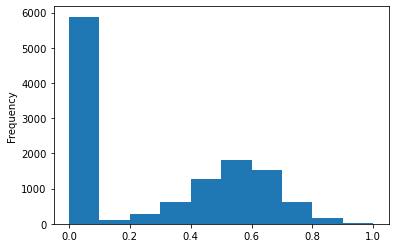

In [34]:
train['AccountMng_Duration_log_scaled'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

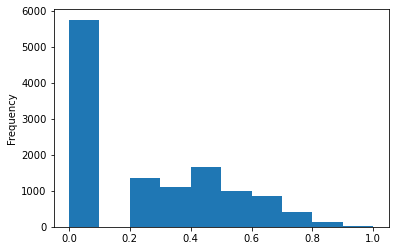

In [35]:
train['AccountMng_Pages_log_scaled'].plot.hist()

In [36]:
# keep duration due to 00Analysis

In [37]:
min(train.AccountMng_Pages)

0

In [38]:
Labels = [0,1,2,3,4]
train['AccountMng_PagesBINs'] = pd.cut(train['AccountMng_Pages'], 
                                 [0,1,4,6,10,27],
                                      labels=Labels)
train['AccountMng_PagesBINs'] = train.AccountMng_PagesBINs.fillna(0)

In [39]:
train.groupby(['AccountMng_PagesBINs']).count()[['Date']]

,Date
AccountMng_PagesBINs,
0,7101
1,2786
2,1006
3,1002
4,404


In [40]:
train[train['Buy']==1].groupby(['AccountMng_PagesBINs']).count()[['Date']]

,Date
AccountMng_PagesBINs,
0,656
1,430
2,191
3,186
4,89


In [41]:
train['AccountMng_YesNo'] = train['AccountMng_Duration']
train['AccountMng_YesNo'][train['AccountMng_YesNo'] != 0] = 1

# FAQ

In [42]:
# similar to AccountMng

In [43]:
train['AvgTimeFAQ'] = train['FAQ_Duration']/train['FAQ_Pages']

In [44]:
train['AvgTimeFAQ'] = train['AvgTimeFAQ'].fillna(0)

In [45]:
train['AvgTimeFAQ_log'] = np.log(train['AvgTimeFAQ']+1)

min_max_scaler = preprocessing.MinMaxScaler()
train['AvgTimeFAQ_log_scaled'] = min_max_scaler.fit_transform(train[['AvgTimeFAQ_log']])

In [46]:
train['FAQ_Pages_log'] = np.log(train['FAQ_Pages']+1)

min_max_scaler = preprocessing.MinMaxScaler()
train['FAQ_Pages_log_scaled'] = min_max_scaler.fit_transform(train[['FAQ_Pages_log']])

In [47]:
train['FAQ_Duration_log'] = np.log(train['FAQ_Duration']+1)

min_max_scaler = preprocessing.MinMaxScaler()
train['FAQ_Duration_log_scaled'] = min_max_scaler.fit_transform(train[['FAQ_Duration_log']])

In [48]:
train['FAQ_Duration_Pages_log_scaled_avg'] = (train['FAQ_Duration_log_scaled'] + train['FAQ_Pages_log_scaled'])/2

In [49]:
# keep pages due to 00Analysis

In [50]:
train['FAQ_YesNo'] = train['FAQ_Duration']
train['FAQ_YesNo'][train['FAQ_YesNo'] != 0] = 1

# Product

In [51]:
# similar to AccountMng

In [52]:
train['AvgTimeProduct'] = train['Product_Duration']/train['Product_Pages']

In [53]:
train['AvgTimeProduct'] = train['AvgTimeProduct'].fillna(0)

In [54]:
train['AvgTimeProduct_log'] = np.log(train['AvgTimeProduct']+1)

min_max_scaler = preprocessing.MinMaxScaler()
train['AvgTimeProduct_log_scaled'] = min_max_scaler.fit_transform(train[['AvgTimeProduct_log']])

In [55]:
train['Product_Pages_log'] = np.log(train['Product_Pages']+1)

min_max_scaler = preprocessing.MinMaxScaler()
train['Product_Pages_log_scaled'] = min_max_scaler.fit_transform(train[['Product_Pages_log']])

In [56]:
train['Product_Duration_log'] = np.log(train['Product_Duration']+1)

min_max_scaler = preprocessing.MinMaxScaler()
train['Product_Duration_log_scaled'] = min_max_scaler.fit_transform(train[['Product_Duration_log']])

In [57]:
train['Product_Duration_Pages_log_scaled_avg'] = (train['Product_Duration_log_scaled'] + train['Product_Pages_log_scaled'])/2

In [58]:
# keep pages due to 00Analysis

In [59]:
train['Product_YesNo'] = train['Product_Duration']
train['Product_YesNo'][train['Product_YesNo'] != 0] = 1

# Total time and pages

In [60]:
train['TotalPages'] = train['Product_Pages'] + train['FAQ_Pages'] + train['AccountMng_Pages'] 

In [61]:
train['AcctPageTime'] = train['Product_Pages'] + train['AccountMng_Pages'] 

In [62]:
train['TotalTime'] = train['Product_Duration'] + train['FAQ_Duration'] + train['AccountMng_Duration'] 

In [63]:
train['TotalTime_log'] = np.log(train['TotalTime']+1)

min_max_scaler = preprocessing.MinMaxScaler()
train['TotalTime_log_scaled'] = min_max_scaler.fit_transform(train[['TotalTime_log']])

New Features here from Marco about time

In [64]:
train['AcctPageTimeTO30'] = train.AcctPageTime.apply(lambda x: 1 if (x <=1800) else 0)

In [65]:
train['AcctPageTime31TO60'] = train.AcctPageTime.apply(lambda x: 1 if ((x <= 3600) & (x > 1800)) else 0)

In [66]:
train['time0TO5'] = train.TotalTime.apply(lambda x: 1 if (x > 300) else 0)

In [67]:
train['time5TO30'] = train.TotalTime.apply(lambda x: 1 if ((x <= 1800) & (x >= 300)) else 0)

In [68]:
train['time31TO60'] = train.TotalTime.apply(lambda x: 1 if ((x <= 3600) & (x > 1800)) else 0)

In [69]:
train['time61UP'] = train.TotalTime.apply(lambda x: 1 if (x < 3600) else 0)

End of time features

In [70]:
train['TotalPages_log'] = np.log(train['TotalPages']+1)

min_max_scaler = preprocessing.MinMaxScaler()
train['TotalPages_log_scaled'] = min_max_scaler.fit_transform(train[['TotalPages_log']])

In [71]:
train['totalTimePages_avg'] = (train['TotalTime_log_scaled'] + train['TotalPages_log_scaled'])/2

In [72]:
# share of pages and duration of AccountMng relative to total pages and duration
train['TimeRelativeShareAccountMng'] = train['AccountMng_Duration']/train['TotalTime']
train['PagesRelativeShareAccountMng'] = train['AccountMng_Pages']/train['TotalPages']

In [73]:
train['TimeRelativeShareAccountMng'] = train['TimeRelativeShareAccountMng'].fillna(0)
train['PagesRelativeShareAccountMng'] = train['PagesRelativeShareAccountMng'].fillna(0)

In [74]:
train['TimePagesRelativeShareAccountMng_avg'] = (train['TimeRelativeShareAccountMng']+train['PagesRelativeShareAccountMng'])/2

In [75]:
# share of pages and duration of FAQ relative to total pages and duration
train['TimeRelativeShareFAQ'] = train['FAQ_Duration']/train['TotalTime']
train['PagesRelativeShareFAQ'] = train['FAQ_Pages']/train['TotalPages']

In [76]:
train['TimeRelativeShareFAQ'] = train['TimeRelativeShareFAQ'].fillna(0)
train['PagesRelativeShareFAQ'] = train['PagesRelativeShareFAQ'].fillna(0)

In [77]:
train['TimePagesRelativeShareFAQ_avg'] = (train['TimeRelativeShareFAQ']+train['PagesRelativeShareFAQ'])/2

In [78]:
# share of pages and duration of FAQ relative to total pages and duration
train['TimeRelativeShareProduct'] = train['Product_Duration']/train['TotalTime']
train['PagesRelativeShareProduct'] = train['Product_Pages']/train['TotalPages']

In [79]:
train['TimeRelativeShareProduct'] = train['TimeRelativeShareProduct'].fillna(0)
train['PagesRelativeShareProduct'] = train['PagesRelativeShareProduct'].fillna(0)

In [80]:
train['TimePagesRelativeShareProduct_avg'] = (train['TimeRelativeShareProduct']+train['PagesRelativeShareProduct'])/2

In [81]:
train = train.drop(['TotalPages_log_scaled', 
                    'TotalTime_log_scaled',
                    'TimeRelativeShareFAQ',
                    'PagesRelativeShareFAQ',
                    'TimeRelativeShareAccountMng',
                    'PagesRelativeShareAccountMng',
                    'TimeRelativeShareProduct',
                    'PagesRelativeShareProduct',
                    'Product_Duration_log_scaled',
                    'Product_Pages_log_scaled',
                    'FAQ_Duration_log_scaled',
                    'FAQ_Pages_log_scaled',
                    'AccountMng_Duration_log_scaled',
                    'AccountMng_Pages_log_scaled'
                    ], axis=1)

In [82]:
train['PTimeP'] = train.apply(lambda x: 
                              round((x['Product_Duration']/x['TotalTime'])*100) if x['TotalTime']>0 else 0, 
                              axis=1)
train['FTimeP'] = train.apply(lambda x: 
                              round((x['FAQ_Duration']/x['TotalTime'])*100) if x['TotalTime']>0 
                              else 0, axis=1)
train['ATimeP'] = train.apply(lambda x: 
                              round((x['AccountMng_Duration']/x['TotalTime'])*100) if x['TotalTime']>0 
                              else 0, axis=1)
train['APTimeP'] = train.apply(lambda x: 
                              round(((x['AccountMng_Duration']+x['Product_Duration'])/x['TotalTime'])*100) if x['TotalTime']>0 
                              else 0, axis=1)

In [83]:
train['FT10'] = train.FTimeP.apply(lambda x: 1 if x>=10 else 0)
train['FT05'] = train.FTimeP.apply(lambda x: 1 if x>=5 else 0)
train['FT15'] = train.FTimeP.apply(lambda x: 1 if x>=15 else 0)
train['FT20'] = train.FTimeP.apply(lambda x: 1 if x>=20 else 0)


train['APT90'] = train.APTimeP.apply(lambda x: 1 if x<=90 else 0)
train['APT95'] = train.APTimeP.apply(lambda x: 1 if x<=95 else 0)
train['APT85'] = train.APTimeP.apply(lambda x: 1 if x<=85 else 0)
train['APT80'] = train.APTimeP.apply(lambda x: 1 if x<=80 else 0)

train['FAPT1090'] = train.apply(lambda x: 1 if ( (x['FTimeP']>=10) & (x['APTimeP']<=90)) else 0, axis=1)
train['FAPT0590'] = train.apply(lambda x: 1 if ( (x['FTimeP']>=5) & (x['APTimeP']<=90)) else 0, axis=1)

train['FAPT1095'] = train.apply(lambda x: 1 if ( (x['FTimeP']>=10) & (x['APTimeP']<=95)) else 0, axis=1)
train['FAPT0595'] = train.apply(lambda x: 1 if ( (x['FTimeP']>=5) & (x['APTimeP']<=95)) else 0, axis=1)


In [84]:
#trainx = train[train['Type_of_Traffic']==2]

Label = [5,15,25,30,60,90]

train['APTime'] = train.apply(lambda x: 
                              x['AccountMng_Duration']+x['Product_Duration'], axis=1)

train['APTimeBins'] = pd.cut(train['APTime'], 
                                 [min(train['APTime']),
                                    300, 900,1500, 1800, 3600,
                                    max(train['APTime'])],
                            labels=Label)

In [85]:

trainx = train[train['Type_of_Visitor']=='New_Access']

trainx['APTime'] = trainx.apply(lambda x: 
                              x['AccountMng_Duration']+x['Product_Duration'], axis=1)

trainx['APTimeBins'] = pd.cut(trainx['APTime'], 
                                 [min(trainx['APTime']),
                                    300, 1500, 1800, 3600,
                                    max(trainx['APTime'])])

In [86]:
train['Visit25'] = train.apply(lambda x: 1 if((x['Type_of_Visitor']=='New_Access') & (x['APTime'] > 1800)) else 0, 
                             axis=1)
train['Traffic25'] = train.apply(lambda x: 1 if((x['Type_of_Traffic']==2) & (x['APTime'] > 1800)) else 0, 
                             axis=1)

In [87]:
train.groupby(['APTimeBins']).agg({'Buy':['sum','count']}).reset_index()

APTimeBins    Buy      
                sum count
0          5  156.0  2476
1         15  452.0  2804
2         25  309.0  1452
3         30   91.0   500
4         60  315.0  1395
5         90  227.0   768

# Google

In [88]:
train['Less5minExit'] = train.apply(lambda x: 
                                1 if (x.TotalTime<301) & (x.GoogleAnalytics_ExitRate >0.041) else 0, 
                                axis=1)
train['Less5minPValue'] = train.apply(lambda x: 
                                1 if (x.TotalTime<301) & (x.GoogleAnalytics_PageValue <22) else 0, 
                                axis=1)

In [89]:
# skip BounceRate and focus on ExitRate

In [90]:
# scaled Exit Rate
min_max_scaler = preprocessing.MinMaxScaler()
train['GoogleAnalytics_ExitRate_scaled'] = min_max_scaler.fit_transform(train[['GoogleAnalytics_ExitRate']])

In [91]:
# equally distributed buckets
bin_labels = [1,2,3,4,5,6,7,8,9,10]
train['quantile_buckets10'] = pd.qcut(train['GoogleAnalytics_ExitRate'], q=10)
train['GoogleAnalytics_ExitRate_buckets10'] = pd.qcut(train['GoogleAnalytics_ExitRate'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
                              labels=bin_labels)

In [92]:
train[['GoogleAnalytics_ExitRate', 'GoogleAnalytics_ExitRate_buckets10', 'quantile_buckets10']]

,GoogleAnalytics_ExitRate,GoogleAnalytics_ExitRate_buckets10,quantile_buckets10
Access_ID,,,
102863333,0.0667,9,"(0.0583, 0.1]"
103117814,0.0449,8,"(0.0413, 0.0583]"
103201891,0.0583,8,"(0.0413, 0.0583]"
103226087,0.0250,5,"(0.0205, 0.0251]"
103234445,0.0093,2,"(0.0074, 0.0121]"
...,...,...,...
962042726,0.0221,5,"(0.0205, 0.0251]"
962063064,0.1000,9,"(0.0583, 0.1]"
962147749,0.0250,5,"(0.0205, 0.0251]"


In [93]:
min_max_scaler = preprocessing.MinMaxScaler()
train['GoogleAnalytics_ExitRate_buckets10_scaled'] = min_max_scaler.fit_transform(train[['GoogleAnalytics_ExitRate_buckets10']])

### GoogleAnalytics_BounceRate

In [94]:
# scaled Exit Rate
min_max_scaler = preprocessing.MinMaxScaler()
train['GoogleAnalytics_BounceRate_scaled'] = min_max_scaler.fit_transform(train[['GoogleAnalytics_BounceRate']])

# GoogleAnalyticsPageValue

In [95]:
train['GoogleAnalytics_PageValue_01'] = train['GoogleAnalytics_PageValue']
train['GoogleAnalytics_PageValue_01'][train['GoogleAnalytics_PageValue_01'] != 0] = 1

In [96]:
train['GoogleAnalytics_PageValue_log'] = np.log(train['GoogleAnalytics_PageValue']+1)

min_max_scaler = preprocessing.MinMaxScaler()
train['GoogleAnalytics_PageValue_log_scaled'] = min_max_scaler.fit_transform(train[['GoogleAnalytics_PageValue_log']])

New Features here about PageValue from Marco

In [97]:
train['GoogleAnalytics_PageValue_53'] = train.GoogleAnalytics_PageValue.apply(lambda x: 
                                                                              1 if x >= 53 else 0)

In [98]:
train['GoogleAnalytics_PageValue_32'] = train.GoogleAnalytics_PageValue.apply(lambda x: 
                                                                              1 if x >= 32 else 0)

In [99]:
train['GoogleAnalytics_PageValue_22'] = train.GoogleAnalytics_PageValue.apply(lambda x: 
                                                                              1 if x >= 22 else 0)

In [100]:
train['GoogleAnalytics_PageValue_22TO32'] = train.GoogleAnalytics_PageValue.apply(lambda x: 
                                                                              1 if ((x < 32) & (x > 21)) else 0)

In [101]:
train['GoogleAnalytics_PageValue_7'] = train.GoogleAnalytics_PageValue.apply(lambda x: 
                                                                              1 if ((x < 8) & (x > 1.39)) else 0)

In [102]:
train['GoogleAnalytics_PageValue_1'] = train.GoogleAnalytics_PageValue.apply(lambda x: 
                                                                              1 if x <= 1.39 else 0)

### Bounce Rate Analysis

In [103]:
len(train[train['GoogleAnalytics_BounceRate']==0.0])

5509

In [104]:
min(train['GoogleAnalytics_ExitRate'])

0.0

In [105]:
train['GoogleAnalytics_BounceRate'].mean()

0.022192666070411787

In [106]:
bin_labels = [1,2,3,4,5,6]
train['BounceRateBins'] = pd.cut(train['GoogleAnalytics_BounceRate'], 
                                 [0,
                                    0.0045,0.0085,0.015, 0.025, 0.065 ,
                                    max(train['GoogleAnalytics_BounceRate'])],
                                labels=bin_labels)
train['BounceRateBins'] = train.BounceRateBins.fillna(1)

In [107]:
train.groupby(['BounceRateBins']).count()[['Date']]

,Date
BounceRateBins,
1,6629
2,1121
3,1191
4,1080
5,1094
6,1184


In [108]:
#train['BounceRateBins']
train[train['Buy']==1].groupby(['BounceRateBins']).count()[['Date']]

,Date
BounceRateBins,
1,1080
2,181
3,147
4,93
5,43
6,8


In [109]:
train['BounceRateBins_scaled'] = min_max_scaler.fit_transform(train[['BounceRateBins']])

<b>Analysis:</b> Lower the bounce rate higher the probability of buy

### Exit Rate Analysis

In [110]:
train['GoogleAnalytics_ExitRate'].mean()

0.04306614358890946

In [111]:
bin_labels = [1,2,3,4,5]
train['ExitRateBins'] = pd.cut(train['GoogleAnalytics_ExitRate'], 
                                 [ 0.0,
                                    0.0085, 0.016, 0.025, 0.041,
                                    max(train['GoogleAnalytics_ExitRate'])],
                              labels=bin_labels)
train['ExitRateBins']  = train.ExitRateBins.fillna(1)

In [112]:
train.groupby(['ExitRateBins']).count()[['Date']]

,Date
ExitRateBins,
1,1490
2,2172
3,2477
4,2450
5,3710


In [113]:
#train['ExitRateBins']

train[train['Buy']==1].groupby(['ExitRateBins']).count()[['Date']]

,Date
ExitRateBins,
1,349
2,434
3,389
4,276
5,104


In [114]:
train['ExitRateBins_scaled'] = min_max_scaler.fit_transform(train[['ExitRateBins']])

In [115]:
train['GoogleAnalytics_ExitRate_BelowAVG'] = train.GoogleAnalytics_ExitRate.apply(lambda x: 
                                                                              1 if x <= 0.043 else 0)

<b>Analysis:</b> Lower the exit rate higher the probability of buy

# OS

In [116]:
train['OS'].unique()

array(['MacOSX', 'Windows', 'Android', 'Ubuntu', 'iOS', 'Other', 'Fedora',
       'Chrome OS'], dtype=object)

In [117]:
train['OS'].value_counts()

Windows      6585
Android      2581
MacOSX       2548
iOS           475
Ubuntu         79
Chrome OS      19
Other           7
Fedora          5
Name: OS, dtype: int64

In [118]:
train.groupby('OS').agg({'Buy': ['sum','count']}).reset_index()

OS    Buy      
                sum count
0    Android  320.0  2104
1  Chrome OS    1.0    15
2     Fedora    0.0     3
3     MacOSX  221.0  2065
4      Other    1.0     5
5     Ubuntu   15.0    68
6    Windows  933.0  5361
7        iOS   61.0   378

In [119]:
# One Hot Encoding for Windows, Android, MacOSX, iOS

In [120]:
train['OS_Windows'] = train['OS']
train['OS_Windows'][train['OS_Windows'] == 'Windows'] = 1
train['OS_Windows'][train['OS_Windows'] != 1] = 0

In [121]:
train['OS_Android'] = train['OS']
train['OS_Android'][train['OS_Android'] == 'Android'] = 1
train['OS_Android'][train['OS_Android'] != 1] = 0

In [122]:
train['OS_MacOSX'] = train['OS']
train['OS_MacOSX'][train['OS_MacOSX'] == 'MacOSX'] = 1
train['OS_MacOSX'][train['OS_MacOSX'] != 1] = 0

In [123]:
train['OS_iOS'] = train['OS']
train['OS_iOS'][train['OS_iOS'] == 'iOS'] = 1
train['OS_iOS'][train['OS_iOS'] != 1] = 0

# Type_of_Visitor

In [124]:
df_Type_of_Visitor = pd.get_dummies(train['Type_of_Visitor'], prefix='Type_of_Visitor')

In [125]:
train = train.merge(df_Type_of_Visitor, left_index=True, right_index=True)

In [126]:
train.Type_of_Visitor_Returner

Access_ID
102863333    1
103117814    1
103201891    1
103226087    1
103234445    1
            ..
962042726    1
962063064    1
962147749    1
962182167    1
962218682    1
Name: Type_of_Visitor_Returner, Length: 12299, dtype: uint8

In [127]:
train['NewTimePV95'] = train.apply(lambda x: 1 if ( (x['APTimeP']<=95) & 
                                               (x['GoogleAnalytics_PageValue'] <22) &
                                               (x['Type_of_Visitor']=='New_Access')
                                              ) else 0, axis=1)
train['RetTimePV90'] = train.apply(lambda x: 1 if ( (x['APTimeP']<=90) & 
                                               (x['GoogleAnalytics_PageValue'] <22) &
                                               (x['Type_of_Visitor']=='Returner')
                                              ) else 0, axis=1)

train['NewTimePV90'] = train.apply(lambda x: 1 if ( (x['APTimeP']<=90) & 
                                               (x['GoogleAnalytics_PageValue'] <22) &
                                               (x['Type_of_Visitor']=='New_Access')
                                              ) else 0, axis=1)
train['RetTimePV85'] = train.apply(lambda x: 1 if ( (x['APTimeP']<=85) & 
                                               (x['GoogleAnalytics_PageValue'] <22) &
                                               (x['Type_of_Visitor']=='Returner')
                                              ) else 0, axis=1)

In [128]:
train['NewTime95'] = train.apply(lambda x: 1 if ( (x['APTimeP']<=95) & 
                                               (x['Type_of_Visitor']=='New_Access')
                                              ) else 0, axis=1)
train['RetTime90'] = train.apply(lambda x: 1 if ( (x['APTimeP']<=90) & 
                                               (x['Type_of_Visitor']=='Returner')
                                              ) else 0, axis=1)

train['NewTime90'] = train.apply(lambda x: 1 if ( (x['APTimeP']<=90) & 
                                               (x['Type_of_Visitor']=='New_Access')
                                              ) else 0, axis=1)
train['RetTime85'] = train.apply(lambda x: 1 if ( (x['APTimeP']<=85) & 
                                               (x['Type_of_Visitor']=='Returner')
                                              ) else 0, axis=1)

# Type_of_Traffic

### distrubute into buckets by percentage:
- Idea:
   - 0-10%
   - 10-20%
   - 20-30%

- percentage of Buy== 1 per value
- 1: 10.8%
- 2: 21.75%
- 3: 8.9%
- 4: 14.9%
- 5: 20.5%
- 6: 12.1%
- 7: 32.3%
- 8: 29.6%
- 9: 8.4%
- 10: 20.3%
- 11: 20.5%
- 12: 0
- 13: 5%
- 14: 7.4%
- 15: 24.4%

- there seems to be a strong difference between the values, probably valuable variable

In [129]:
# bucket 1: 3,9,12,5,14
# bucket 2: 1,4,6
# bucket 3: 2,5,7,8,10,11,15

In [130]:
train['Type_of_Traffic']

Access_ID
102863333     1
103117814     6
103201891     1
103226087     2
103234445     3
             ..
962042726     1
962063064     3
962147749    11
962182167     3
962218682    13
Name: Type_of_Traffic, Length: 12299, dtype: int64

### one hot encoding of Type_of_Traffic

In [131]:
df_Type_of_Traffic = pd.get_dummies(train['Type_of_Traffic'], prefix='Type_of_Traffic')

In [132]:
train = train.merge(df_Type_of_Traffic, left_index=True, right_index=True)

In [133]:
train.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue',
       ...
       'Type_of_Traffic_6', 'Type_of_Traffic_7', 'Type_of_Traffic_8',
       'Type_of_Traffic_9', 'Type_of_Traffic_10', 'Type_of_Traffic_11',
       'Type_of_Traffic_12', 'Type_of_Traffic_13', 'Type_of_Traffic_14',
       'Type_of_Traffic_15'],
      dtype='object', length=147)

# Jessica's Features

In [134]:
# Weekend feature
train['Weekend'] = 0     
train.loc[train['Date_dayofweek'].isin([6, 7]), 'Weekend'] = 1 

In [135]:
train['Quarter'] = train['Date'].dt.quarter

In [136]:
df_quarter = pd.get_dummies(train['Quarter'], prefix='Quarter')
train = train.merge(df_quarter, left_index=True, right_index=True)

# Marco's Features

In [137]:
def page_combo(acct, faq, prod):
    
    if (acct == 0) & (faq == 0) & (prod == 0):
        page_visits = 0
    elif (acct > 0) & (faq == 0) &(prod == 0):
        page_visits = 1
    elif (acct == 0) & (faq > 0) & (prod == 0):
        page_visits = 2
    elif (acct == 0) & (faq == 0) & (prod > 0):
        page_visits = 3
    elif (acct > 0) & (faq > 0) & (prod == 0):
        page_visits = 4
    elif (acct > 0) & (faq == 0) & (prod > 0):
        page_visits = 5
    elif (acct == 0) & (faq > 0) & (prod > 0):
        page_visits = 6
    elif (acct > 0) & (faq > 0) & (prod > 0):
        page_visits = 7
        
    return page_visits

In [138]:
def above_mean(df, column_name):
    #Calculating the average of column_name in dataframe
    column_average = df[column_name].mean()
    
    #Initialising avariable is_above_average
    is_above_average = []
    #Looping through each value in column_name
    for i in df[column_name]:
        #Check if column_value is above average then indicate 1 as true
        if i > column_average:
            is_above_average.append(1)
        #Check if column_value is above average then indicate 0 as false
        elif i <= column_average:
            is_above_average.append(0)
         #Check if column_value is above average then indicate nan as value is nan
        elif pd.isnull(i):
            is_above_average.append(np.nan)
            
    return is_above_average

In [139]:
def is_percentile(df):
    #Calculating the average of column_name in dataframe
    minq = min(df)
    q25 = np.percentile(df, 25)
    q50 = np.percentile(df, 50)
    q75 = np.percentile(df, 75)
    maxq = max(df)
    
    #Initialising avariable is_above_average
    is_in_q = []
    #Looping through each value in column_name
    for i in df:
        #Check if column_value is above average then indicate 1 as true
        if (i > minq) & (i <= q25):
            is_in_q.append(0.25)
        #Check if column_value is above average then indicate 0 as false
        elif (i > q25) & (i <= q50):
            is_in_q.append(0.50)
         #Check if column_value is above average then indicate nan as value is nan
        elif (i > q50) & (i <= q75):
            is_in_q.append(0.75)
        elif (i > q75) & (i <= maxq):
            is_in_q.append(1)
        elif pd.isnull(i):
            is_in_q.append(np.nan)
        else:
            is_in_q.append(0)
            
    return is_in_q

In [140]:
def time_o_pv(v, t):
    value = 0
    # If value is greater or equal than two
    if v >= 4:
        if t <= 5.05:
            value = 6
        elif (t > 5.05) & (t <= 6.152):
            value = 7
        elif (t > 6.152) & (t <= 6.871):
            value = 8
        elif (t > 6.871) & (t <= 7.598):
            value = 9
        elif (t > 7.598) & (t <= 11.155):
            value = 10
    else: # If value is less than two
        if t <= 5.05:
            value = 1
        elif (t > 5.05) & (t <= 6.152):
            value = 2
        elif (t > 6.152) & (t <= 6.871):
            value = 3
        elif (t > 6.871) & (t <= 7.598):
            value = 4
        elif (t > 7.598) & (t <= 11.155):
            value = 5
    
    return value

In [141]:
#Public Holidays

def is_holiday(date):
    
    is_holiday = 0
    #Christmas
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-12-18') <= date <= pd.to_datetime('2020-12-25') else is_holiday
    #Christmas
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-12-01') <= date <= pd.to_datetime('2020-12-01') else is_holiday
    #Christmas
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-12-08') <= date <= pd.to_datetime('2020-12-08') else is_holiday
    #Thanks Giving
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-11-22') <= date <= pd.to_datetime('2020-11-28') else is_holiday
    #Halloween
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-10-31') <= date <= pd.to_datetime('2020-11-02') else is_holiday
    #Christmas
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-08-14') <= date <= pd.to_datetime('2020-08-15') else is_holiday
    #Independence
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-07-01') <= date <= pd.to_datetime('2020-01-04') else is_holiday
    #FathersDay
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-06-15') <= date <= pd.to_datetime('2020-06-21') else is_holiday
    #MothersDay
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-05-01') <= date <= pd.to_datetime('2020-05-03') else is_holiday
    #Easter
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-04-06') <= date <= pd.to_datetime('2020-04-12') else is_holiday
        #StPatricks
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-03-15') <= date <= pd.to_datetime('2020-03-17') else is_holiday
    #ValentinesDay
    is_holiday = is_holiday + 1 if pd.to_datetime('2020-02-10') <= date <= pd.to_datetime('2020-02-14') else is_holiday
    #NewYear
    is_holiday = is_holiday + 1 if pd.to_datetime('2019-12-31') <= date <= pd.to_datetime('2020-01-02') else is_holiday
    
    return is_holiday


In [142]:
train['holidays'] = train['Date'].map(lambda x: is_holiday(x))

In [143]:
#list_sample = []
train['page_visits'] = train.apply(lambda x: page_combo(x.AccountMng_Pages, x.FAQ_Pages, x.Product_Pages), axis=1)

In [144]:
df_page_visits = pd.get_dummies(train['page_visits'], prefix='page_visits')
train = train.merge(df_page_visits, left_index=True, right_index=True)

In [145]:
#Checking if average time matters in buying
train['above_avg_AT'] = above_mean(train,'AccountMng_Duration')
train['above_avg_FT'] = above_mean(train,'FAQ_Duration')
train['above_avg_PT'] = above_mean(train,'Product_Duration')

#Checking if average Pages in buying
train['above_avg_AP'] = above_mean(train,'AccountMng_Pages')
train['above_avg_FP'] = above_mean(train,'FAQ_Pages')
train['above_avg_PP'] = above_mean(train,'Product_Pages')

#Checking if GoogleAnalytics_BounceRate is above avg
train['above_avg_BounceRate'] = above_mean(train,'GoogleAnalytics_BounceRate')

#Checking if GoogleAnalytics_ExitRate is above avg
train['above_avg_ExitRate'] = above_mean(train,'GoogleAnalytics_ExitRate')

#Checking if GoogleAnalytics_PageValue is above avg
train['above_avg_PageValue'] = above_mean(train,'GoogleAnalytics_PageValue')


In [146]:
train['BounceRate_Q'] = is_percentile(train.GoogleAnalytics_BounceRate)
train['ExitRate_Q'] = is_percentile(train.GoogleAnalytics_ExitRate)

In [147]:
# Sum all the total time spent
#train['TotalTime'] = train[['AccountMng_Duration','FAQ_Duration','Product_Duration']].sum(axis=1)

# Log the total time spent
#train['TotalTime_log_scaled'] = np.where(train['TotalTime']>0 , 
#                                         np.log(train['TotalTime']), 0)

In [148]:
# Log the page value
#train['PageValue_log_scaled'] = np.where(train['GoogleAnalytics_PageValue'] > 0 , 
#                                         np.log(train['GoogleAnalytics_PageValue']), 0)

In [149]:
# Bins of TotalTime_log_scaled
'''bins = [ min(train.TotalTime_log_scaled),5.05, 6.152, 6.871, 7.598, max(train.TotalTime_log_scaled)]

# Create bins of Total Time log
train['timeBins'] = pd.cut(train['TotalTime_log_scaled'], 
                             bins, labels = [5.05, 6.152, 6.871, 7.598, 11.155])'''

"bins = [ min(train.TotalTime_log_scaled),5.05, 6.152, 6.871, 7.598, max(train.TotalTime_log_scaled)]\n\n# Create bins of Total Time log\ntrain['timeBins'] = pd.cut(train['TotalTime_log_scaled'], \n                             bins, labels = [5.05, 6.152, 6.871, 7.598, 11.155])"

In [150]:
# Calculate the time and page_value transformation
#train['time_o_pv'] = train.apply(lambda x: time_o_pv(x.GoogleAnalytics_PageValue_log_scaled, x.timeBins), axis=1)

In [151]:
eu = ['France', 'Germany', 'Italy', 'Portugal', 'Spain', 'Switzerland', 'United Kingdom']
train['IsEU'] = train.Country.apply(lambda x: 1 if x in eu else 0)

In [152]:
# Grouping sources
source = train.groupby('Type_of_Traffic').count()[['Browser']].reset_index().rename({'Browser':'Count'})
# Checking sources that are above the mean number
above_mean = source[source['Browser']>source.Browser.mean()]['Type_of_Traffic']
# Encoding if source traffic belongs to the group where above the mean
train['source_Above_Mean'] = train.Type_of_Traffic.apply(lambda x: 1 if x in above_mean else 0)

In [153]:
#Most traffic in the site are comming from the two browsers [1 and 2] 84%
# 2 has 65% total and buy is 10% in when using browsers 2
train['Browser_1'] = train.Browser.apply(lambda x: 1 if x == 1 else 0)
train['Browser_2'] = train.Browser.apply(lambda x: 1 if x == 2 else 0)
train['Browser_all'] = train.Browser.apply(lambda x: 1 if x not in [1,2] else 0)

# Correlation

In [154]:
# Average time proportion in total duration
train['AvgFAQTimePct'] = train.apply(lambda x: 0 if (x[['AvgTimeProduct','AvgTimeFAQ','AvgTimeAccountMng']].sum()==0)\
                      else x['AvgTimeFAQ']/x[['AvgTimeProduct','AvgTimeFAQ','AvgTimeAccountMng']].sum(),
                      axis = 1)

train['AvgTimeProductPct'] = train.apply(lambda x: 0 if (x[['AvgTimeProduct','AvgTimeFAQ','AvgTimeAccountMng']].sum()==0)\
                      else x['AvgTimeProduct']/x[['AvgTimeProduct','AvgTimeFAQ','AvgTimeAccountMng']].sum(),
                      axis = 1)

train['AvgTimeAccountMngPct'] = train.apply(lambda x: 0 if (x[['AvgTimeProduct','AvgTimeFAQ','AvgTimeAccountMng']].sum()==0)\
                      else x['AvgTimeAccountMng']/x[['AvgTimeProduct','AvgTimeFAQ','AvgTimeAccountMng']].sum(),
                      axis = 1)

In [155]:
# Pages proportion in total pages
train['FAQPPct'] = train.apply(lambda x: 0 if (x[['FAQ_Pages','AccountMng_Pages','Product_Pages']].sum()==0)\
                      else x['FAQ_Pages']/x[['FAQ_Pages','AccountMng_Pages','Product_Pages']].sum(),
                      axis = 1)

train['ProductPPct'] = train.apply(lambda x: 0 if (x[['FAQ_Pages','AccountMng_Pages','Product_Pages']].sum()==0)\
                      else x['Product_Pages']/x[['FAQ_Pages','AccountMng_Pages','Product_Pages']].sum(),
                      axis = 1)

train['AccountMngPPct'] = train.apply(lambda x: 0 if (x[['FAQ_Pages','AccountMng_Pages','Product_Pages']].sum()==0)\
                      else x['AccountMng_Pages']/x[['FAQ_Pages','AccountMng_Pages','Product_Pages']].sum(),
                      axis = 1)

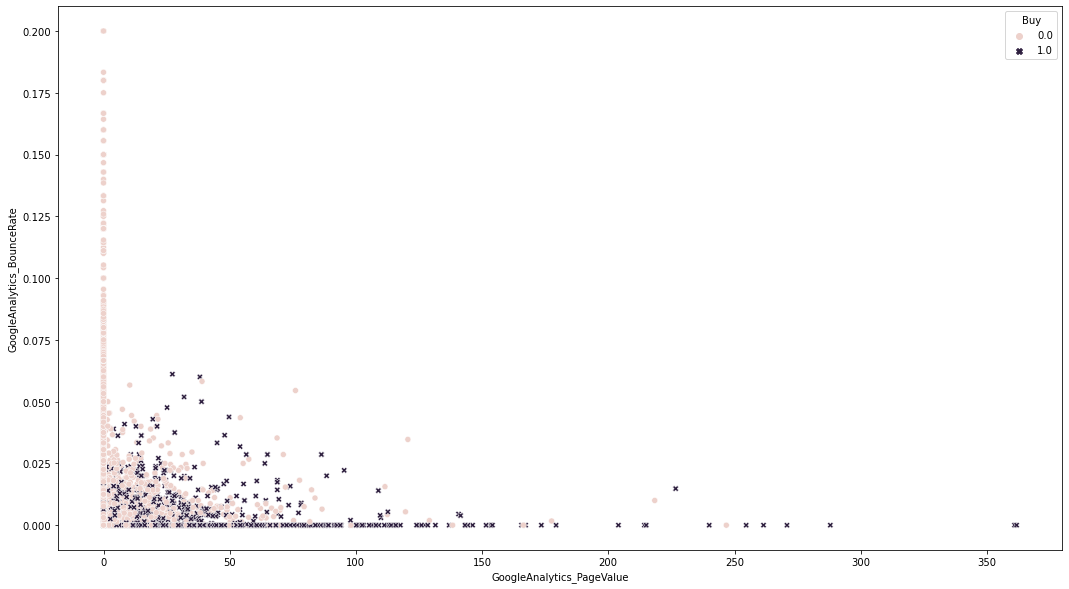

In [156]:
# Prepare figure
sns.color_palette("flare", as_cmap=True)
fig = plt.figure(figsize=(18, 10))
sns.scatterplot(data=train[train['GoogleAnalytics_BounceRate']< 200], 
                x="GoogleAnalytics_PageValue", y="GoogleAnalytics_BounceRate" , hue="Buy", style="Buy" , alpha=1)
plt.show()

In [157]:
train[(train['TotalPages']>5) &(train['TotalPages']<30)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,...,source_Above_Mean,Browser_1,Browser_2,Browser_all,AvgFAQTimePct,AvgTimeProductPct,AvgTimeAccountMngPct,FAQPPct,ProductPPct,AccountMngPPct
Access_ID,,,,,,,,,,,,,,,,,,,,,
103117814,2020-05-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,...,0,0,1,0,0.0,1.000000,0.000000,0.0,1.000000,0.000000
103201891,2020-12-04,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,...,1,0,0,1,0.0,1.000000,0.000000,0.0,1.000000,0.000000
103226087,2020-12-22,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,...,1,0,1,0,0.0,1.000000,0.000000,0.0,1.000000,0.000000
103279585,2020-03-19,0,0.0,0,0.0,12,249.5000,0.0056,0.0250,0.0000,...,1,0,0,1,0.0,1.000000,0.000000,0.0,1.000000,0.000000
103364259,2020-03-13,0,0.0,0,0.0,17,469.4167,0.0000,0.0118,0.0000,...,1,1,0,0,0.0,1.000000,0.000000,0.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961939573,2020-12-30,8,162.5,0,0.0,9,156.5000,0.0182,0.0273,0.0000,...,0,1,0,0,0.0,0.461227,0.538773,0.0,0.529412,0.470588
961941286,2020-11-16,0,0.0,0,0.0,9,198.1333,0.0000,0.0533,0.0000,...,1,1,0,0,0.0,1.000000,0.000000,0.0,1.000000,0.000000
962147749,2020-11-22,2,45.5,0,0.0,22,535.0000,0.0000,0.0250,9.6503,...,0,0,1,0,0.0,0.516659,0.483341,0.0,0.916667,0.083333


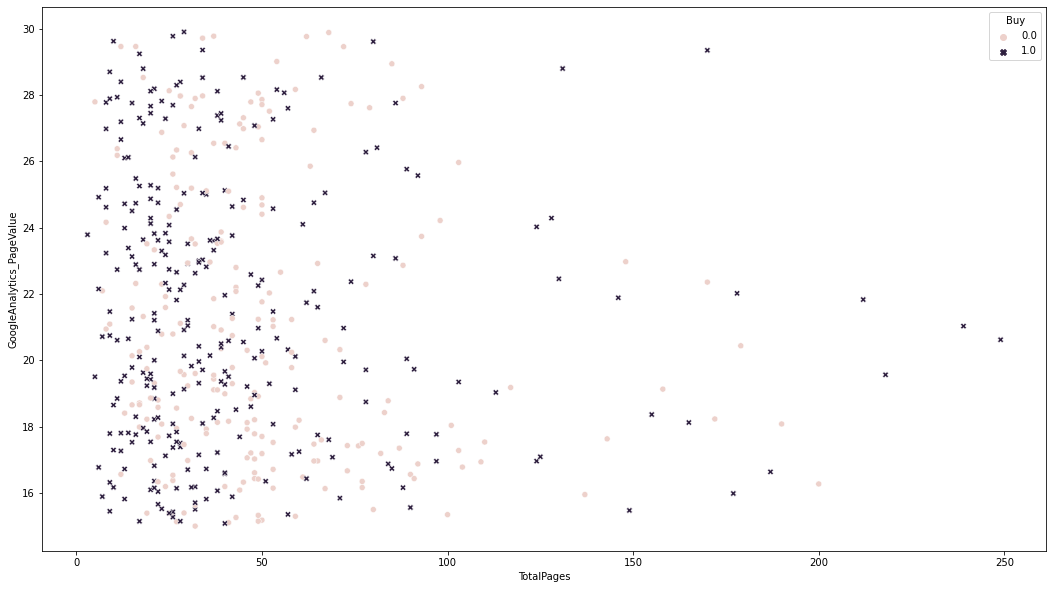

In [158]:
# Prepare figure
sns.color_palette("flare", as_cmap=True)
fig = plt.figure(figsize=(18, 10))
sns.scatterplot(data=train[(train['GoogleAnalytics_PageValue'] < 30) & (train['GoogleAnalytics_PageValue'] > 15)]
                , x="TotalPages", y="GoogleAnalytics_PageValue" , hue="Buy", style="Buy" , alpha=1)
plt.show()

In [159]:
sub_data = []
for i in range(3,200):
    sub_train = train[(train['TotalPages'] > 3)& (train['TotalPages'] < i)]
    sub_train = sub_train[['TotalPages', 'GoogleAnalytics_PageValue', 'Buy']]
    buy = len(sub_train[sub_train['Buy']==1])
    buyPercent = buy/len(sub_train) if (buy > 0) else 0
    not_buy = len(sub_train[sub_train['Buy']==0])
    not_buyPercent = not_buy/len(sub_train) if (not_buy > 0) else 0
    mean_pagevalue = sub_train.GoogleAnalytics_PageValue.mean()
    sub_data.append([len(sub_train), buy, buyPercent, not_buy, not_buyPercent , 
                     mean_pagevalue, sub_train.GoogleAnalytics_PageValue.max(), i])

In [160]:
sub_data = pd.DataFrame(sub_data, columns = ['Count', 'NoBuy', 'BuyPct', 'NoNotBuy', 'NotBuyPct', 'Mean' ,'Max', 'I'])

<AxesSubplot:xlabel='I', ylabel='BuyPct'>

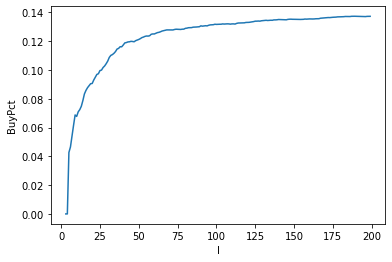

In [161]:
#may_flights = flights.query("month == 'May'")
sns.lineplot(data=sub_data, x="I", y="BuyPct")

<AxesSubplot:xlabel='NotBuyPct', ylabel='I'>

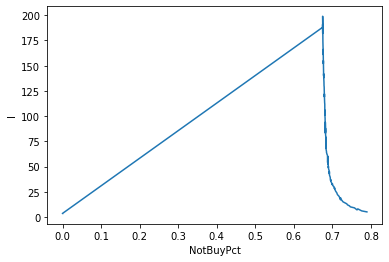

In [162]:
sns.lineplot(data=sub_data, x="NotBuyPct", y="I")

# Finish Features

In [163]:
#save copy of train
train_copy = train

In [164]:
#train = train_copy

In [165]:
train = train.drop([ 
                    'AccountMng_Pages',
                    'AccountMng_Duration',
                    'FAQ_Pages',
                    'FAQ_Duration',
                    'Product_Pages',
                    'Product_Duration',
                    'GoogleAnalytics_BounceRate',
                    'GoogleAnalytics_ExitRate',
                    'GoogleAnalytics_PageValue',
                    
                    #'OS',
                    
                    #'Browser',
                    #'Country', 
                    #'Type_of_Traffic', 
                    
                    'Type_of_Visitor',
                    'Date_year',
                    'Date_dayofweek',
                    'AvgTimeAccountMng',
                    'AvgTimeAccountMng_log',
                    'AccountMng_Duration_log',
                    'TotalPages',
                    'TotalTime',
                    'TotalTime_log',
                    'TotalPages_log', 
                    'AvgTimeFAQ', 
                    'AvgTimeFAQ_log',
                    'FAQ_Pages_log', 
                    'AvgTimeProduct',
                    'AvgTimeProduct_log',
                    'Product_Pages_log',
                    'quantile_buckets10',
                    'GoogleAnalytics_ExitRate_buckets10',
                    'page_visits',
                    'GoogleAnalytics_PageValue_log',
                    'Quarter'
                    ], axis=1)

In [166]:
train.shape

(12299, 155)

### Try PCA to reduce the dimensionality of Type_of_Traffic

In [167]:
train_ToT = train[['Type_of_Traffic_1', 'Type_of_Traffic_2', 'Type_of_Traffic_3', 'Type_of_Traffic_4', 
                  'Type_of_Traffic_5', 'Type_of_Traffic_6', 'Type_of_Traffic_7', 'Type_of_Traffic_8',
                  'Type_of_Traffic_9', 'Type_of_Traffic_10', 'Type_of_Traffic_11', 'Type_of_Traffic_12',
                  'Type_of_Traffic_13', 'Type_of_Traffic_14']]

In [168]:
from sklearn.decomposition import PCA
# Loop Function to identify number of principal components that explain at least 85% of the variance

#assign Type_of_Traffic data
df3 = train_ToT

for comp in range(3, df3.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(df3)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.8:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(df3)
cluster_df=Final_PCA.transform(df3)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 5 components, we can explain 0.8428704366662058% of the variability in the original data.


In [169]:
train_ToT_PCA = pd.DataFrame(cluster_df)
train_ToT_PCA.index = train.index

In [170]:
train_ToT_PCA.columns =['Type_of_Traffic_PCA1', 'Type_of_Traffic_PCA2', 'Type_of_Traffic_PCA3', 
                        'Type_of_Traffic_PCA4', 'Type_of_Traffic_PCA5', #'Type_of_Traffic_PCA6'
                       ]

In [171]:
train = train.merge(train_ToT_PCA, left_index=True, right_index=True)

In [172]:
'''train = train.drop(['Type_of_Traffic_1',
                   'Type_of_Traffic_2',
                   'Type_of_Traffic_3',
                   'Type_of_Traffic_4',
                   'Type_of_Traffic_5',
                   'Type_of_Traffic_6',
                   'Type_of_Traffic_7',
                   'Type_of_Traffic_8',
                   'Type_of_Traffic_9',
                   'Type_of_Traffic_10',
                   'Type_of_Traffic_11',
                   'Type_of_Traffic_12',
                   'Type_of_Traffic_13',
                   'Type_of_Traffic_14'
                   ],
                   axis = 1) # axis = 1 --> columns (0 -> rows)'''

"train = train.drop(['Type_of_Traffic_1',\n                   'Type_of_Traffic_2',\n                   'Type_of_Traffic_3',\n                   'Type_of_Traffic_4',\n                   'Type_of_Traffic_5',\n                   'Type_of_Traffic_6',\n                   'Type_of_Traffic_7',\n                   'Type_of_Traffic_8',\n                   'Type_of_Traffic_9',\n                   'Type_of_Traffic_10',\n                   'Type_of_Traffic_11',\n                   'Type_of_Traffic_12',\n                   'Type_of_Traffic_13',\n                   'Type_of_Traffic_14'\n                   ],\n                   axis = 1) # axis = 1 --> columns (0 -> rows)"

In [173]:
train.columns

Index(['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Buy', 'set',
       'Date_month', 'Date_month_2', 'Date_month_3',
       ...
       'AvgTimeProductPct', 'AvgTimeAccountMngPct', 'FAQPPct', 'ProductPPct',
       'AccountMngPPct', 'Type_of_Traffic_PCA1', 'Type_of_Traffic_PCA2',
       'Type_of_Traffic_PCA3', 'Type_of_Traffic_PCA4', 'Type_of_Traffic_PCA5'],
      dtype='object', length=160)

In [174]:
train = train.drop('Date', axis=1)
train.to_csv('20211202_total_features.csv')